In [15]:
import pandas as pd
import numpy as np
import time
import pandas as ps
import pandasql as ps
from sklearn.cross_validation import train_test_split
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Users\\IBM_ADMIN\\Documents\\Test\\Disney_All2.csv', delimiter=',', encoding='utf8')
df.head(10)

,subscription_source_ref,subscription_day,platform_x,sku_x,total_streams_started_x,total_streams_watched_x,total_minutes_watched_x,average_minutes_watched_x,days_watched_to_date,streams_started_to_date,...,monthy_active_user_flag,monthly_minutes_watched,monthly_streams_watched,weekly_active_user_flag_y,weekly_minutes_watched,weekly_streams_watched,daily_active_user_flag_y,daily_minutes_watched,daily_streams_watched,updated_as_of
0,GPA.3349-2466-4165-43812,10/1/2018,GOOGLE,com.espn.monthly.espnplus7dft.google,3,1,0.289583,0.289583,1,3,...,0,0.0,0,0,0.0,0,0,0.0,0,1/7/2019
1,GPA.3349-2466-4165-43812,10/2/2018,GOOGLE,com.espn.monthly.espnplus7dft.google,0,0,0.000000,0.000000,1,3,...,0,0.0,0,0,0.0,0,0,0.0,0,1/7/2019
2,GPA.3349-2466-4165-43812,10/3/2018,GOOGLE,com.espn.monthly.espnplus7dft.google,0,0,0.000000,0.000000,1,3,...,0,0.0,0,0,0.0,0,0,0.0,0,1/7/2019
3,GPA.3349-2466-4165-43812,10/4/2018,GOOGLE,com.espn.monthly.espnplus7dft.google,0,0,0.000000,0.000000,1,3,...,0,0.0,0,0,0.0,0,0,0.0,0,1/7/2019
4,GPA.3349-2466-4165-43812,10/5/2018,GOOGLE,com.espn.monthly.espnplus7dft.google,0,0,0.000000,0.000000,1,3,...,0,0.0,0,0,0.0,0,0,0.0,0,1/7/2019
5,GPA.3349-2466-4165-43812,10/6/2018,GOOGLE,com.espn.monthly.espnplus7dft.google,0,0,0.000000,0.000000,1,3,...,0,0.0,0,0,0.0,0,0,0.0,0,1/7/2019
6,GPA.3349-2466-4165-43812,10/7/2018,GOOGLE,com.espn.monthly.espnplus7dft.google,0,0,0.000000,0.000000,1,3,...,0,0.0,0,0,0.0,0,0,0.0,0,1/7/2019
7,GPA.3349-2466-4165-43812,10/8/2018,GOOGLE,com.espn.monthly.espnplus7dft.google,0,0,0.000000,0.000000,1,3,...,0,0.0,0,0,0.0,0,0,0.0,0,1/7/2019
8,GPA.3382-6234-7693-05108,10/1/2018,GOOGLE,com.espn.monthly.espnplus7dft.google,1,1,0.454333,0.454333,1,1,...,0,0.0,0,0,0.0,0,0,0.0,0,1/7/2019
9,GPA.3382-6234-7693-05108,10/2/2018,GOOGLE,com.espn.monthly.espnplus7dft.google,0,0,0.000000,0.000000,1,1,...,0,0.0,0,0,0.0,0,0,0.0,0,1/7/2019


In [26]:
df2 = """

    SELECT
        subscription_source_ref as sub_id,
        swid as user_id,
        first_stream_media_id as f_media_id,
        f_title,
        f_sport,
        second_stream_media_id as s_media_id,
        s_title,
        s_sport,
        converted_to_paid,
        total_streams_watched_x as tot_str,
        total_minutes_watched_x as tot_min,
        average_minutes_watched_x as avg_min
       
        FROM df; """

df3 = (ps.sqldf(df2, locals()))
df3.head(5)

,sub_id,user_id,f_media_id,f_title,f_sport,s_media_id,s_title,s_sport,converted_to_paid,tot_str,tot_min,avg_min
0,GPA.3349-2466-4165-43812,None,4535397b-641c-4aed-a45b-eb8bbc3694a7,"Mon, 10/1 - Iâ€™ll Take That Bet",None,None,None,None,0,1,0.289583,0.289583
1,GPA.3349-2466-4165-43812,None,4535397b-641c-4aed-a45b-eb8bbc3694a7,"Mon, 10/1 - Iâ€™ll Take That Bet",None,None,None,None,0,0,0.000000,0.000000
2,GPA.3349-2466-4165-43812,None,4535397b-641c-4aed-a45b-eb8bbc3694a7,"Mon, 10/1 - Iâ€™ll Take That Bet",None,None,None,None,0,0,0.000000,0.000000
3,GPA.3349-2466-4165-43812,None,4535397b-641c-4aed-a45b-eb8bbc3694a7,"Mon, 10/1 - Iâ€™ll Take That Bet",None,None,None,None,0,0,0.000000,0.000000
4,GPA.3349-2466-4165-43812,None,4535397b-641c-4aed-a45b-eb8bbc3694a7,"Mon, 10/1 - Iâ€™ll Take That Bet",None,None,None,None,0,0,0.000000,0.000000


In [27]:
mean_count = pd.DataFrame(df3.groupby('f_title')['tot_str'].mean())
mean_count['streams'] = pd.DataFrame(df3.groupby('f_title')['tot_str'].count())
mean_count.head()

,tot_str,streams
f_title,,
#13 Wisconsin vs. Clarkson (M Hockey),0.000000,14
#14 Michigan vs. Oakland (M Soccer),0.762305,833
#18 Virginia Tech vs. Davidson (M Soccer),0.000000,14
#21 Fordham vs. Saint Joseph's (M Soccer),0.864198,162
#23 Baylor vs. Kansas (W Volleyball),0.656134,538


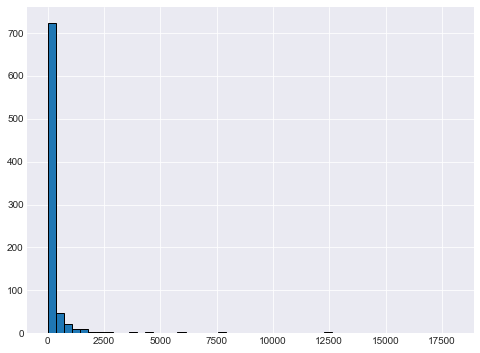

In [28]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
mean_count['streams'].hist(bins=50)

C:\Users\IBM_ADMIN\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\IBM_ADMIN\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 576x432 with 0 Axes>

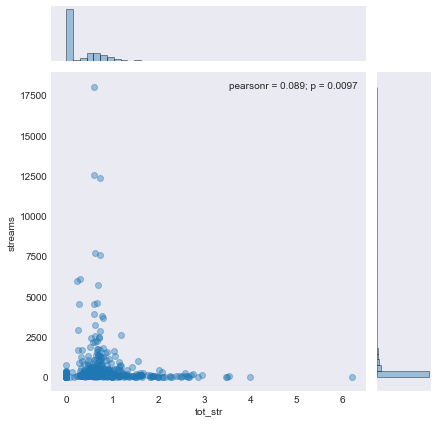

In [29]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='tot_str', y='streams', data=mean_count, alpha=0.4)